# DATA EXPLORATION 
# Load & Preview the CSVs

In [438]:
# Import the pandas library for data manipulation and analysis
import pandas as pd
from datetime import datetime

# Load the datasets from CSV files into pandas DataFrames
# 'users' DataFrame contains user-related information
users = pd.read_csv("USER_TAKEHOME.csv")

# 'transactions' DataFrame contains transactional data, including purchases and receipts
transactions = pd.read_csv("TRANSACTION_TAKEHOME.csv")

# 'products' DataFrame contains product-related information such as brand and category
products = pd.read_csv("PRODUCTS_TAKEHOME.csv")



In [440]:
# Display the first five rows of the 'users' DataFrame to get an overview of the user-related data
users.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


In [442]:
# Display the first five rows of the 'transactions' DataFrame 
# to inspect the structure and contents of transaction records
transactions.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,8/21/2024,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,7/20/2024,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,8/18/2024,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1,
3,000239aa-3478-453d-801e-66a82e39c8af,6/18/2024,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,7/4/2024,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1,


In [444]:
# Display the first five rows of the 'products' DataFrame 
# to check the available product-related information
products.head()


,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


In [446]:
# checking the volume of transaction records and associated attributes
print("Transactions dimension: \n",transactions.shape)

# checking the number of users and available user-related features
print("Users dimension: \n",users.shape)

# checking how many product records and attributes are available
print("Products dimension: \n",products.shape)

Transactions dimension: 
 (50000, 8)
Users dimension: 
 (100000, 6)
Products dimension: 
 (845552, 7)


In [448]:
# Extract the unique user IDs from both tables
users_list = set(users['ID'].dropna().astype(str))
transactions_list = set(transactions['USER_ID'].dropna().astype(str))

# Find user IDs in transactions but not in users
missing_users = transactions_list - users_list

# Convert to DataFrame and display
missing_users_df = pd.DataFrame(list(missing_users), columns=["user_id"])
missing_users_df

,user_id
0,5c65d4b08554b31dd2e893e8
1,62a66e8b37737fe70d02de0d
2,6518a1d655f575777d103674
3,65d8abf0fe555d15f289edf1
4,6339d9b627ef842ac62dd00a
...,...
17598,60900efbceb1a477e8a49548
17599,6246469a9082231a3d7c16ac
17600,666de22c465f309038ab0f5a
17601,61aec86e06570b5913a50b20


In [164]:
# Display summary information about the 'transactions' DataFrame
# Includes number of entries, column names, data types, and missing values
transactions.info()

# Display summary information about the 'users' DataFrame
# Helps identify data types, missing values, and memory usage
users.info()

# Display summary information about the 'products' DataFrame
# Useful for understanding the structure of product-related data
products.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      6949

<!-- Check for Data Quality Issues -->
<!-- Check Missing values for products, users and transactions  -->
users.isnull().sum()
Duplicates: df.duplicated().sum()
Data types: df.info()
Inconsistent values (e.g., date formats, categories)

In [167]:
# Check Missing values for products, users and transactions
print("Users missing values: \n",users.isnull().sum())
print("Transactions missing values: \n",transactions.isnull().sum())
print("Products missing values: \n",products.isnull().sum())

Users missing values: 
 ID                  0
CREATED_DATE        0
BIRTH_DATE       3675
STATE            4812
LANGUAGE        30508
GENDER           5892
dtype: int64
Transactions missing values: 
 RECEIPT_ID           0
PURCHASE_DATE        0
SCAN_DATE            0
STORE_NAME           0
USER_ID              0
BARCODE           5762
FINAL_QUANTITY       0
FINAL_SALE           0
dtype: int64
Products missing values: 
 CATEGORY_1         111
CATEGORY_2        1424
CATEGORY_3       60566
CATEGORY_4      778093
MANUFACTURER    226474
BRAND           226472
BARCODE           4025
dtype: int64


In [169]:
print("Duplicated user records:\n", users.duplicated().sum())
print("Duplicated product records:\n", products.duplicated().sum())
print("Duplicated transactions records:\n", transactions.duplicated().sum())

Duplicated user records:
 0
Duplicated product records:
 215
Duplicated transactions records:
 171


In [203]:
# Inconsistent values for users dataset (e.g., date formats, categories)

In [173]:
# Missing values in BIRTH_DATE column is less that 5%, so I'll drop the missing records
# Missing values in STATE  column is less that 5%, so I'll drop the missing records
# Missing values in Language column is 30%, I think I'll Impute this with the most common.
users["LANGUAGE"].value_counts()

LANGUAGE
en        63403
es-419     6089
Name: count, dtype: int64

In [ ]:
# Language column has "en" which is English	Generic, used for English-speaking users worldwide
# 'es-419' is used for Used for Spanish speakers in Latin America & the Caribbean, can be used for localization and personalization for different users.

In [450]:
users

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female
...,...,...,...,...,...,...
99995,61fc06d41febf771966da8fa,2022-02-03 16:46:12.000 Z,1992-03-16 08:00:00.000 Z,CA,en,female
99996,6391e7ef90ad5449ec5f782d,2022-12-08 13:34:39.000 Z,1993-09-23 05:00:00.000 Z,MO,en,female
99997,637d5efdd6f2a49c49934dcb,2022-11-22 23:45:05.000 Z,1983-04-19 00:00:00.000 Z,RI,en,female
99998,5f0de23b05d8a6147dc0cafa,2020-07-14 16:50:04.000 Z,1995-06-09 04:00:00.000 Z,DE,en,female


In [150]:
# Checking if the data is missing at random or not
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# sns.heatmap(users[['BIRTH_DATE']].isnull(), cmap="viridis", cbar=False, yticklabels=False)
# plt.title("Missing Values Heatmap for BIRTH_DATE")
# plt.show()
# print(users[users['BIRTH_DATE'].isnull()].groupby('STATE').size())
# print(users[users['BIRTH_DATE'].isnull()].groupby('GENDER').size())
# print(users[users['BIRTH_DATE'].isnull()].groupby('LANGUAGE').size())


In [181]:
import pandas as pd

# Count missing LANGUAGE values by STATE
print("Missing LANGUAGE by STATE:")
print(users[users["LANGUAGE"].isnull()].groupby("STATE")["LANGUAGE"].size().sort_values(ascending=False))
# TX    0.094844
# FL    0.188564
# CA    0.278796
# NY    0.338709
# IL    0.378567
# GA    0.417626
# PA    0.455908
# OH    0.492877 same as the the top users state list, could be chance or related.

# Count missing LANGUAGE values by GENDER
print("\nMissing LANGUAGE by GENDER:")
print(users[users["LANGUAGE"].isnull()].groupby("GENDER")["LANGUAGE"].size().sort_values(ascending=False))

# Count missing LANGUAGE values by BIRTH_DATE (checking missing birth dates too)
print("\nMissing LANGUAGE by BIRTH_DATE (Missing vs. Present):")
print(users.groupby(users["BIRTH_DATE"].isnull())["LANGUAGE"].apply(lambda x: x.isnull().sum()))


Missing LANGUAGE by STATE:
STATE
CA    3010
TX    2846
FL    2220
NY    1568
GA    1055
IL    1038
NC     943
PA     868
OH     866
NJ     740
MI     733
AL     643
VA     640
TN     629
AZ     619
IN     594
CO     476
MD     468
KY     467
MO     457
MA     435
SC     430
LA     429
WA     428
CT     401
WI     380
AR     368
MN     340
OK     338
MS     312
KS     306
PR     302
NV     280
IA     268
OR     258
UT     211
AK     207
DE     200
WV     165
NM     157
HI     153
ID     149
NE     144
DC     134
ME     130
NH      90
RI      78
WY      63
MT      61
SD      57
ND      53
VT      28
Name: LANGUAGE, dtype: int64

Missing LANGUAGE by GENDER:
GENDER
female                    16500
male                       9541
transgender                1075
unknown                     129
prefer_not_to_say           107
non_binary                   54
not_listed                   25
not_specified                17
Non-Binary                   14
My gender isn't listed        2
Prefer not

In [183]:
# I'll do this later after Level 1 processing
# Data in Languages is missing at random so I'll impute with the mode
# Calculate the mode of the LANGUAGE column
# language_mode = users["LANGUAGE"].mode()[0]

# # Fill missing values with the mode
# users["LANGUAGE"].fillna(language_mode, inplace=True)

# # Verify that there are no more missing values in LANGUAGE
# print(users["LANGUAGE"].isnull().sum())

In [185]:
# State missing values is missing completely at random so we drop it
# Drop rows where STATE is missing
# users = users.dropna(subset=['STATE'])

# # Verify that there are no more missing values in STATE
# print(users['STATE'].isnull().sum())

# # Check the new shape of the dataset
# print(users.shape)


In [187]:
print(users.isnull().sum())

ID                  0
CREATED_DATE        0
BIRTH_DATE       1559
STATE               0
LANGUAGE        28235
GENDER           2483
dtype: int64


In [189]:
# Filter rows where BIRTH_DATE is missing
missing_birthdate = users[users['BIRTH_DATE'].isnull()]

# Count how many of those rows also have missing GENDER
missing_gender_count = missing_birthdate['GENDER'].isnull().sum()

# Count total missing BIRTH_DATE entries
total_missing_birthdate = missing_birthdate.shape[0]

# Calculate the proportion of missing GENDER among missing BIRTH_DATE rows
proportion_missing_gender = missing_gender_count / total_missing_birthdate

# Print results
print(f"Total missing BIRTH_DATE: {total_missing_birthdate}")
print(f"Missing GENDER where BIRTH_DATE is missing: {missing_gender_count}")
print(f"Proportion of missing GENDER among missing BIRTH_DATE: {proportion_missing_gender:.2%}")


Total missing BIRTH_DATE: 1559
Missing GENDER where BIRTH_DATE is missing: 1509
Proportion of missing GENDER among missing BIRTH_DATE: 96.79%


In [128]:
# There's a relationship between Birthrate and Gender, what should I do with this data?


In [191]:
users["STATE"].value_counts()

STATE
TX    9028
FL    8921
CA    8589
NY    5703
IL    3794
GA    3718
PA    3644
OH    3519
NC    3399
NJ    2899
MI    2582
VA    2400
IN    2213
TN    2165
AL    1792
SC    1773
KY    1731
AZ    1728
MO    1652
MD    1636
MA    1523
WI    1389
PR    1361
LA    1290
WA    1234
CO    1139
MN    1125
CT    1110
OK    1100
AR    1011
MS     960
IA     933
NV     837
KS     835
OR     700
WV     674
UT     593
DE     492
NE     487
NM     452
ME     368
NH     359
HI     350
ID     350
AK     297
RI     284
DC     241
SD     205
ND     185
MT     169
WY     138
VT     111
Name: count, dtype: int64

In [193]:
import pandas as pd
# Which states make 80 percent of our userbase?
# Get state counts
state_counts = users["STATE"].value_counts()

# Calculate cumulative percentage
state_cumsum = state_counts.cumsum() / state_counts.sum()

# Filter states contributing to 80% of users
top_states = state_cumsum[state_cumsum <= 0.80]

print(top_states)


STATE
TX    0.094844
FL    0.188564
CA    0.278796
NY    0.338709
IL    0.378567
GA    0.417626
PA    0.455908
OH    0.492877
NC    0.528586
NJ    0.559041
MI    0.586166
VA    0.611380
IN    0.634628
TN    0.657373
AL    0.676199
SC    0.694825
KY    0.713010
AZ    0.731164
MO    0.748519
MD    0.765706
MA    0.781706
WI    0.796298
Name: count, dtype: float64


In [199]:
users["GENDER"].value_counts()
# Different versions of similar labels exist, e.g., "non_binary" vs. "Non-Binary", "prefer_not_to_say" vs. "Prefer not to say".
# Standardizing gender categories (e.g., merging variations) improves data quality.
# We need to merge some of the gender qualities because they mean kinda the same thing
# prefer_not_to_say 1317 and Prefer not to say 1 = same thing
# non_binary 464 and Non-Binary 33  = same thing
# not_listed 176  not_specified 25 My gender isn't listed 5
# 

GENDER
female                    63536
male                      25316
transgender                1653
prefer_not_to_say          1317
non_binary                  464
unknown                     179
not_listed                  176
Non-Binary                   33
not_specified                25
My gender isn't listed        5
Prefer not to say             1
Name: count, dtype: int64

In [201]:
# Calculate and display gender percentages after fixing the data qualities
gender_percentages = (users["GENDER"].value_counts(normalize=True) * 100).round(2)

# Print the results
print(gender_percentages)


GENDER
female                    68.54
male                      27.31
transgender                1.78
prefer_not_to_say          1.42
non_binary                 0.50
unknown                    0.19
not_listed                 0.19
Non-Binary                 0.04
not_specified              0.03
My gender isn't listed     0.01
Prefer not to say          0.00
Name: proportion, dtype: float64


In [ ]:
# create age from  Birth_data column

In [140]:
users

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54+00:00,2000-08-11 00:00:00+00:00,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55+00:00,2001-09-24 04:00:00+00:00,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18+00:00,1994-10-28 00:00:00+00:00,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22+00:00,NaT,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50+00:00,1972-03-19 00:00:00+00:00,PA,en,female
...,...,...,...,...,...,...
99995,61fc06d41febf771966da8fa,2022-02-03 16:46:12+00:00,1992-03-16 08:00:00+00:00,CA,en,female
99996,6391e7ef90ad5449ec5f782d,2022-12-08 13:34:39+00:00,1993-09-23 05:00:00+00:00,MO,en,female
99997,637d5efdd6f2a49c49934dcb,2022-11-22 23:45:05+00:00,1983-04-19 00:00:00+00:00,RI,en,female
99998,5f0de23b05d8a6147dc0cafa,2020-07-14 16:50:04+00:00,1995-06-09 04:00:00+00:00,DE,en,female


In [454]:
# Convert Date Columns (CREATED_DATE, BIRTH_DATE) to datetime format for accurate time-based analysis.
users["CREATED_DATE"] = pd.to_datetime(users["CREATED_DATE"], errors="coerce")
users["BIRTH_DATE"] = pd.to_datetime(users["BIRTH_DATE"], errors="coerce")

In [456]:
# Calculate Age
# Get today's date
today = datetime.today()

# Compute Age
users["AGE"] = users["BIRTH_DATE"].apply(
    lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)) if pd.notnull(x) else None
)

# Display the updated dataframe
# import ace_tools as tools
# tools.display_dataframe_to_user(name="Users Age DataFrame", dataframe=users)

In [223]:
users

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,AGE
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54+00:00,2000-08-11 00:00:00+00:00,CA,es-419,female,24.0
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55+00:00,2001-09-24 04:00:00+00:00,PA,en,female,23.0
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18+00:00,1994-10-28 00:00:00+00:00,FL,es-419,female,30.0
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22+00:00,NaT,NC,en,NaN,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50+00:00,1972-03-19 00:00:00+00:00,PA,en,female,52.0
...,...,...,...,...,...,...,...
99995,61fc06d41febf771966da8fa,2022-02-03 16:46:12+00:00,1992-03-16 08:00:00+00:00,CA,en,female,32.0
99996,6391e7ef90ad5449ec5f782d,2022-12-08 13:34:39+00:00,1993-09-23 05:00:00+00:00,MO,en,female,31.0
99997,637d5efdd6f2a49c49934dcb,2022-11-22 23:45:05+00:00,1983-04-19 00:00:00+00:00,RI,en,female,41.0
99998,5f0de23b05d8a6147dc0cafa,2020-07-14 16:50:04+00:00,1995-06-09 04:00:00+00:00,DE,en,female,29.0


In [458]:
users["AGE"].value_counts()

AGE
24.0     5321
44.0     3400
25.0     3195
42.0     3142
43.0     2803
         ... 
113.0       1
6.0         1
101.0       1
122.0       1
117.0       1
Name: count, Length: 121, dtype: int64

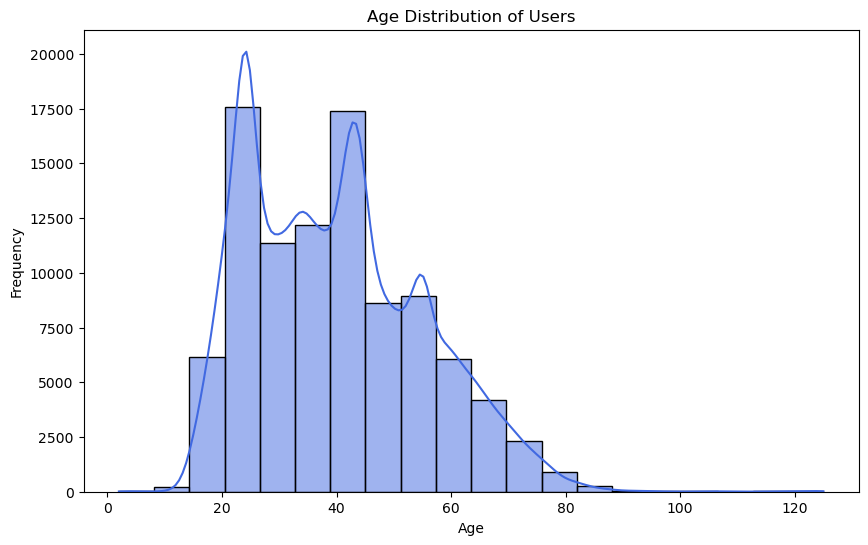

In [227]:
# We have outlier ages - 113, 6.0, 101, 122.0, 117.0
import matplotlib.pyplot as plt
import seaborn as sns

# Drop NaN values in AGE column for visualization
age_data = users["AGE"].dropna()

# Create a histogram to visualize age distribution
plt.figure(figsize=(10, 6))
sns.histplot(age_data, bins=20, kde=True, color="royalblue")

# Set labels and title
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution of Users")

# Show the plot
plt.show()


In [229]:
# The distribution is right-skewed, meaning there are more younger users than older ones.
# There are multiple peaks, suggesting distinct age groups in the data.

# Peak Age Groups:
# There is a significant concentration of users in the 20-30 and 40-50 age ranges.
# Another smaller peak appears around 60+, indicating a smaller but notable presence of older users.

# Some users appear to have extreme ages (e.g., above 100), which could indicate data entry errors or unusual cases.

# Diversity of Users:The spread of ages suggests a broad range of users from young adults to older individuals.



In [436]:
users

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female
...,...,...,...,...,...,...
99995,61fc06d41febf771966da8fa,2022-02-03 16:46:12.000 Z,1992-03-16 08:00:00.000 Z,CA,en,female
99996,6391e7ef90ad5449ec5f782d,2022-12-08 13:34:39.000 Z,1993-09-23 05:00:00.000 Z,MO,en,female
99997,637d5efdd6f2a49c49934dcb,2022-11-22 23:45:05.000 Z,1983-04-19 00:00:00.000 Z,RI,en,female
99998,5f0de23b05d8a6147dc0cafa,2020-07-14 16:50:04.000 Z,1995-06-09 04:00:00.000 Z,DE,en,female


C:\Users\Eve\AppData\Local\Temp\ipykernel_8028\495310060.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  users['YearMonth'] = users['CREATED_DATE'].dt.to_period('M')  # Year-Month format


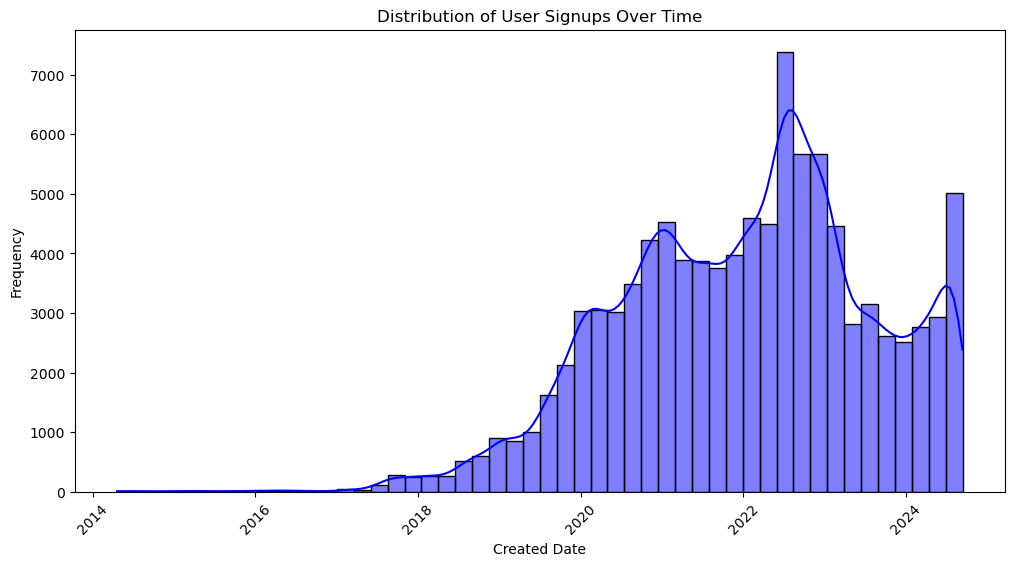

C:\Users\Eve\AppData\Local\Temp\ipykernel_8028\2421961634.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=users['Year'], palette="viridis")


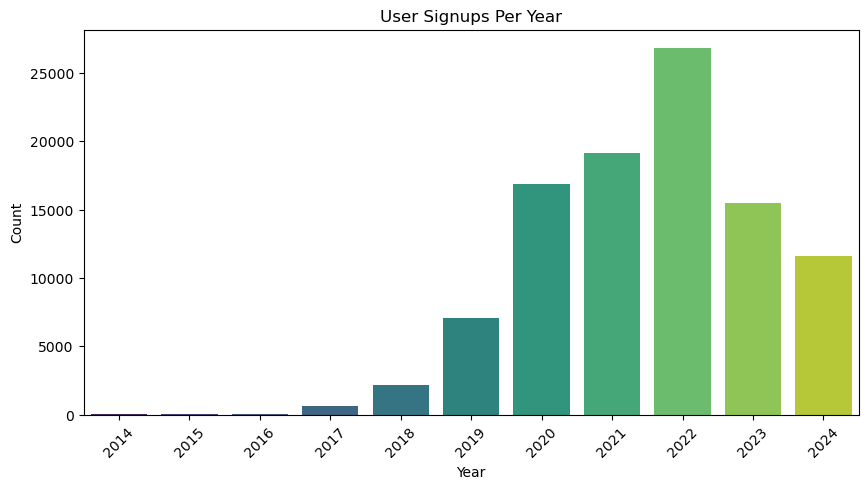

In [233]:
# Plot signups per year
plt.figure(figsize=(10, 5))
sns.countplot(x=users['Year'], palette="viridis")
plt.title("User Signups Per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()



C:\Users\Eve\AppData\Local\Temp\ipykernel_8028\407228349.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=users['Month'], palette="coolwarm", order=range(1, 13))


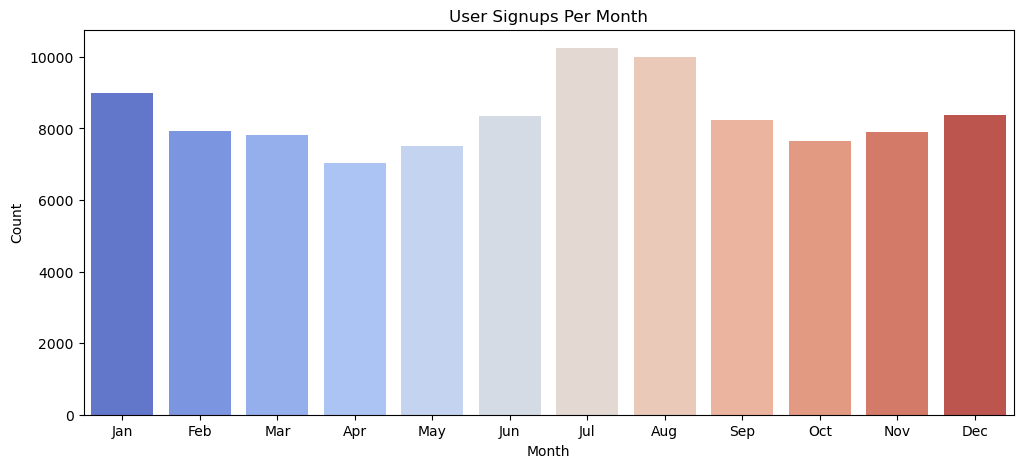

In [235]:
# Plot signups per month
plt.figure(figsize=(12, 5))
sns.countplot(x=users['Month'], palette="coolwarm", order=range(1, 13))
plt.title("User Signups Per Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()



C:\Users\Eve\AppData\Local\Temp\ipykernel_8028\2573000599.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  users['YearMonth'] = users['CREATED_DATE'].dt.to_period('M')


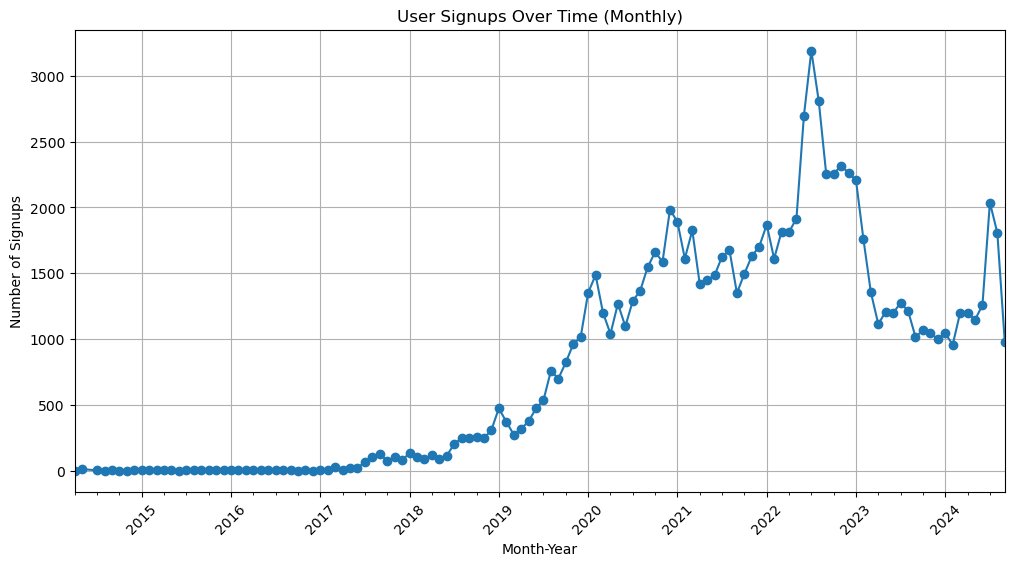

In [253]:
# Plot trend of signups over time (by month)
# Extract month names instead of just month numbers
# Group data by year and month
users['YearMonth'] = users['CREATED_DATE'].dt.to_period('M')

# Aggregate the count of users per month
monthly_signups = users.groupby('YearMonth').size()

# Plot the time series
plt.figure(figsize=(12, 6))
monthly_signups.plot(marker='o', linestyle='-')

# Formatting
plt.title("User Signups Over Time (Monthly)")
plt.xlabel("Month-Year")
plt.ylabel("Number of Signups")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.grid(True)

plt.show()

In [368]:
transactions.isnull().sum()

RECEIPT_ID           0
PURCHASE_DATE        0
SCAN_DATE            0
STORE_NAME           0
USER_ID              0
BARCODE           5762
FINAL_QUANTITY       0
FINAL_SALE           0
dtype: int64

In [370]:
# Each row corresponds to a single product on the receipt.
transactions

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,
...,...,...,...,...,...,...,...,...
49995,b5cd61a9-8033-4913-a5c4-fb3f65e3a321,2024-08-21,2024-08-31 14:13:08.634 Z,TARGET,6154bcf098f885648de2f299,8.523911e+10,2.00,1.18
49996,e1b2f634-c9ad-4152-b662-4b22efc25862,2024-08-11,2024-08-11 18:15:56.736 Z,STOP & SHOP,60aa809f188b926b2244c974,4.610040e+10,1.00,2.00
49997,b07ef8dd-e444-40a2-819b-f74a3e5f1ae7,2024-07-11,2024-07-11 08:03:25.816 Z,WALMART,60bd26e83dc3b13a15c5f4e7,6.466300e+11,1.00,20.96
49998,42475141-bef4-4df2-aa37-72577e2512bb,2024-06-18,2024-06-18 19:57:32.211 Z,MARKET BASKET,6169912fac47744405af62b7,4.180050e+10,1.00,3.00


In [263]:
transactions["RECEIPT_ID"].value_counts()

RECEIPT_ID
bedac253-2256-461b-96af-267748e6cecf    12
bc304cd7-8353-4142-ac7f-f3ccec720cb3     8
4ec870d2-c39f-4a40-bf8a-26a079409b20     8
2acd7e8d-37df-4e51-8ee5-9a9c8c1d9711     8
760c98da-5174-401f-a203-b839c4d406be     8
                                        ..
56a368e6-d677-459d-ba05-70a886c3126b     2
56a0e14c-187c-43ec-96ab-b67ac5c197f1     2
569f4be9-63d1-4afd-8ed5-d520ce85b878     2
56946262-15b1-41fd-8814-fc544d35fc6c     2
fffe8012-7dcf-4d84-b6c6-feaacab5074a     2
Name: count, Length: 24440, dtype: int64

In [265]:
transactions["PURCHASE_DATE"].value_counts()

PURCHASE_DATE
2024-06-15    774
2024-07-03    772
2024-07-01    752
2024-08-03    720
2024-07-13    712
             ... 
2024-09-07    428
2024-08-21    422
2024-09-06    394
2024-09-04    390
2024-09-08    282
Name: count, Length: 89, dtype: int64

In [354]:
print(transactions["STORE_NAME"].value_counts())

STORE_NAME
WALMART                   21326
DOLLAR GENERAL STORE       2748
ALDI                       2640
KROGER                     1494
TARGET                     1484
                          ...  
SPIRITS                       2
LA GLORIA SUPERMERCADO        2
FARM FRESH                    2
ALTA                          2
PLATEAU TRAVEL CENTER         2
Name: count, Length: 954, dtype: int64


In [356]:
pd.set_option("display.max_rows", None)  # Show all rows
print(transactions["STORE_NAME"].value_counts())
pd.reset_option("display.max_rows")  # Reset back to default
FINAL_QUANTITY	

STORE_NAME
WALMART                                                               21326
DOLLAR GENERAL STORE                                                   2748
ALDI                                                                   2640
KROGER                                                                 1494
TARGET                                                                 1484
DOLLAR TREE STORES INC                                                 1238
PUBLIX                                                                 1192
MEIJER                                                                 1174
CVS                                                                    1172
WALGREENS                                                              1132
COSTCO                                                                 1038
SAM'S CLUB                                                             1030
FOOD LION                                                               606
S

In [376]:
transactions["FINAL_QUANTITY"].unique()

array(['1.00', 'zero', '2.00', '3.00', '4.00', '4.55', '2.83', '2.34',
       '0.46', '7.00', '18.00', '12.00', '5.00', '2.17', '0.23', '8.00',
       '1.35', '0.09', '2.58', '1.47', '16.00', '0.62', '1.24', '1.40',
       '0.51', '0.53', '1.69', '6.00', '2.39', '2.60', '10.00', '0.86',
       '1.54', '1.88', '2.93', '1.28', '0.65', '2.89', '1.44', '2.75',
       '1.81', '276.00', '0.87', '2.10', '3.33', '2.54', '2.20', '1.93',
       '1.34', '1.13', '2.19', '0.83', '2.61', '0.28', '1.50', '0.97',
       '0.24', '1.18', '6.22', '1.22', '1.23', '2.57', '1.07', '2.11',
       '0.48', '9.00', '3.11', '1.08', '5.53', '1.89', '0.01', '2.18',
       '1.99', '0.04', '2.25', '1.37', '3.02', '0.35', '0.99', '1.80',
       '3.24', '0.94', '2.04', '3.69', '0.70', '2.52', '2.27'],
      dtype=object)

In [289]:
print("Duplicated transactions records:\n", transactions.duplicated().sum())
# Users may have mistakenly uploaded the same receipt twice, or there could be a system issue causing repeated entries.

Duplicated transactions records:
 171


In [329]:
# Check for duplicated RECEIPT_ID with different SCAN_DATE
duplicates = transactions.duplicated(subset=['RECEIPT_ID'], keep=False)  # Mark all duplicate RECEIPT_IDs

diff_scan_dates = transactions[duplicates].sort_values(by=['RECEIPT_ID', 'SCAN_DATE'])

diff_scan_dates.shape

(50000, 9)

In [335]:
transactions.shape

(50000, 9)

In [283]:
 transactions["BARCODE"].nunique()

11027

In [285]:
# Count the number of duplicate values in a barcode
duplicate_counts = transactions['BARCODE'].duplicated().sum()

print(f"Number of duplicated values in COLUMN_NAME: {duplicate_counts}")


Number of duplicated values in COLUMN_NAME: 38972


In [287]:
transactions.shape

(50000, 8)

In [364]:
# Convert SCAN_DATE to datetime if it's not already
transactions['SCAN_DATE'] = pd.to_datetime(transactions['SCAN_DATE'])

# Extract only the date part (ignoring time zones and time)
transactions['SCAN_DATE_ONLY'] = transactions['SCAN_DATE'].dt.date

# Check for duplicated RECEIPT_ID with different SCAN_DATE_ONLY
duplicates = transactions.duplicated(subset=['RECEIPT_ID'], keep=False) 

# Filter records where RECEIPT_ID is duplicated but SCAN_DATE_ONLY is different
diff_scan_dates = transactions[duplicates].sort_values(by=['RECEIPT_ID', 'SCAN_DATE_ONLY'])

# Drop duplicates based on RECEIPT_ID and keep only those with different SCAN_DATE_ONLY
diff_scan_dates = diff_scan_dates.drop_duplicates(subset=['RECEIPT_ID', 'SCAN_DATE_ONLY'], keep=False)

# Display the transactions where the same receipt was scanned on different days
print(diff_scan_dates)


Empty DataFrame
Columns: [RECEIPT_ID, PURCHASE_DATE, SCAN_DATE, STORE_NAME, USER_ID, BARCODE, FINAL_QUANTITY, FINAL_SALE, SCAN_DATE_ONLY]
Index: []


In [307]:
print("Duplicated product records:\n", products.duplicated().sum())

Duplicated product records:
 215


In [374]:
transactions

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,
...,...,...,...,...,...,...,...,...
49995,b5cd61a9-8033-4913-a5c4-fb3f65e3a321,2024-08-21,2024-08-31 14:13:08.634 Z,TARGET,6154bcf098f885648de2f299,8.523911e+10,2.00,1.18
49996,e1b2f634-c9ad-4152-b662-4b22efc25862,2024-08-11,2024-08-11 18:15:56.736 Z,STOP & SHOP,60aa809f188b926b2244c974,4.610040e+10,1.00,2.00
49997,b07ef8dd-e444-40a2-819b-f74a3e5f1ae7,2024-07-11,2024-07-11 08:03:25.816 Z,WALMART,60bd26e83dc3b13a15c5f4e7,6.466300e+11,1.00,20.96
49998,42475141-bef4-4df2-aa37-72577e2512bb,2024-06-18,2024-06-18 19:57:32.211 Z,MARKET BASKET,6169912fac47744405af62b7,4.180050e+10,1.00,3.00


In [380]:
transactions["USER_ID"].value_counts()

USER_ID
64e62de5ca929250373e6cf5    22
604278958fe03212b47e657b    20
62925c1be942f00613f7365e    20
64063c8880552327897186a5    18
61d5f5d2c4525a3a478b386b    14
                            ..
6001995e7d490d12da987a9e     2
64112b2d9a24fe3c365ca74c     2
5fd7d2b8315ed4790b892807     2
6429b6d73d4434e63c1982cb     2
62a0c8f7d966665570351bb8     2
Name: count, Length: 17694, dtype: int64

In [341]:
products

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11
...,...,...,...,...,...,...,...
845547,Health & Wellness,Topical Muscle & Joint Relief Treatments,Braces & Wraps,NaN,NaN,NaN,7.223016e+11
845548,Snacks,Cookies,NaN,NaN,"TREEHOUSE FOODS, INC.",LOFTHOUSE,4.182082e+10
845549,Snacks,Candy,Confection Candy,NaN,HARIBO GMBH & CO KG,HARIBO,1.001672e+11
845550,Snacks,Nuts & Seeds,Hazelnuts,NaN,DOUBLE-COLA CO,JUMBO,7.539076e+10


In [382]:
products.isnull().sum()

CATEGORY_1         111
CATEGORY_2        1424
CATEGORY_3       60566
CATEGORY_4      778093
MANUFACTURER    226474
BRAND           226472
BARCODE           4025
dtype: int64

In [384]:
products["CATEGORY_1"].value_counts()

CATEGORY_1
Health & Wellness         512695
Snacks                    324817
Beverages                   3990
Pantry                       871
Apparel & Accessories        846
Dairy                        602
Needs Review                 547
Alcohol                      503
Home & Garden                115
Restaurant                    69
Deli & Bakery                 69
Frozen                        62
Meat & Seafood                49
Sporting Goods                47
Office & School               45
Toys & Games                  28
Household Supplies            24
Produce                       20
Animals & Pet Supplies        16
Arts & Entertainment           7
Electronics                    5
Mature                         3
Vehicles & Parts               3
Baby & Toddler                 3
Beauty                         2
Media                          2
Luggage & Bags                 1
Name: count, dtype: int64

In [386]:
products["CATEGORY_2"].value_counts()

CATEGORY_2
Candy                      121036
Hair Care                  111482
Medicines & Treatments      99118
Bath & Body                 81469
Skin Care                   62587
                            ...  
Games                           1
Vehicle Storage & Cargo         1
Audio                           1
Pasta & Noodles                 1
Baby Transport                  1
Name: count, Length: 121, dtype: int64

In [398]:
pd.set_option("display.max_rows", None)  # Show all rows
print(products["CATEGORY_2"].value_counts())
pd.reset_option("display.max_rows")  # Reset back to default

CATEGORY_2
Candy                                             121036
Hair Care                                         111482
Medicines & Treatments                             99118
Bath & Body                                        81469
Skin Care                                          62587
Nuts & Seeds                                       33522
Cookies                                            30418
Eye Care                                           25017
Chips                                              23728
Oral Care                                          22514
First Aid                                          19363
Topical Muscle & Joint Relief Treatments           18600
Snack Bars                                         18498
Medical Supplies & Equipment                       16798
Dips & Salsa                                       16268
Hair Removal                                       13599
Fruit & Vegetable Snacks                           13387
Puffed Snacks       

In [388]:
products["CATEGORY_3"].value_counts()

CATEGORY_3
Confection Candy                 56965
Vitamins & Herbal Supplements    55700
Chocolate Candy                  47710
Hair Styling Products            20450
Reading Glasses                  20394
                                 ...  
Fuel Containers & Tanks              1
Beans                                1
Dry Pasta                            1
Chair & Sofa Cushions                1
Baby Carriers                        1
Name: count, Length: 344, dtype: int64

In [402]:
pd.set_option("display.max_rows", None)  # Show all rows
print(products["CATEGORY_3"].value_counts())
pd.reset_option("display.max_rows")  # Reset back to default

CATEGORY_3
Confection Candy                             56965
Vitamins & Herbal Supplements                55700
Chocolate Candy                              47710
Hair Styling Products                        20450
Reading Glasses                              20394
Hand & Body Lotions                          18793
Shampoo                                      17722
Conditioner                                  17183
Hair Care Accessories                        16754
Braces & Wraps                               15203
Body Wash                                    15073
Hair Color                                   14432
Liquid Hand Soap                             12491
Potato Chips                                 11186
Lip Balms & Treatments                       11101
Popcorn                                      10271
Facial Lotion & Moisturizer                   9913
Hazelnuts                                     9700
Digestive Health Medicines & Treatments       9594
Bar Soap            

In [390]:
products["CATEGORY_4"].value_counts()

CATEGORY_4
Lip Balms                      9737
Already Popped Popcorn         6974
Sleep Aids                     4978
Hair Brushes & Combs           4724
Women's Shaving Gel & Cream    3874
                               ... 
Sherbet                           1
Coconut Milk                      1
Corn Syrup                        1
White Merlot                      1
Spices                            1
Name: count, Length: 127, dtype: int64

In [404]:
pd.set_option("display.max_rows", None)  # Show all rows
print(products["CATEGORY_4"].value_counts())
pd.reset_option("display.max_rows")  # Reset back to default

CATEGORY_4
Lip Balms                                          9737
Already Popped Popcorn                             6974
Sleep Aids                                         4978
Hair Brushes & Combs                               4724
Women's Shaving Gel & Cream                        3874
Men's Razors                                       2840
Heartburn & Antacids Medicines & Treatments        2756
Constipation Relief Medicines & Treatments         2739
Immune Support                                     2682
Microwave Popcorn                                  2313
Women's Razors                                     2296
Cough & Chest Congestion Medicines & Treatments    2213
Hair Straighteners                                 2036
Gas Relief Medicines & Treatments                  1745
Regular Cola                                       1555
Cold & Flu Medicines & Treatments                  1416
Medicated Lip Treatments                           1324
Skin Toners                          

In [406]:
pd.set_option("display.max_rows", None)  # Show all rows
print(products["MANUFACTURER"].value_counts())
pd.reset_option("display.max_rows")  # Reset back to default

MANUFACTURER
PLACEHOLDER MANUFACTURER                                  86902
PROCTER & GAMBLE                                          21065
REM MANUFACTURER                                          20813
UNILEVER                                                  16864
L'OREAL                                                   16699
PEPSICO                                                   14468
JOHNSON & JOHNSON                                         10443
THE HERSHEY COMPANY                                       10222
MARS WRIGLEY                                               9732
MONDELĒZ INTERNATIONAL                                     7250
CVS                                                        7004
CAMPBELL SOUP COMPANY                                      6740
GENERAL MILLS                                              6370
WALMART INC.                                               5626
HALEON                                                     5401
FERRARA CANDY COMPANY      

In [432]:
# products["BRAND"].value_counts()
pd.set_option("display.max_rows", None)  # Show all rows
print(products["BRAND"].value_counts())
pd.reset_option("display.max_rows")  # Reset back to default

BRAND
REM BRAND                                     20813
BRAND NOT KNOWN                               17025
PRIVATE LABEL                                 13467
CVS                                            6400
SEGO                                           4831
MEIJER                                         4050
DOVE                                           3857
RITE AID                                       3238
MATRIX                                         2958
EQUATE                                         2946
BRAND NEEDS REVIEW                             2904
REDKEN                                         2579
SHEA MOISTURE                                  2525
KROGER BRAND                                   2433
V.W.E.                                         2385
NEUTROGENA                                     2227
SUAVE                                          2206
SWANSON                                        2180
PANTENE                                        2133
TIGI  

In [460]:
# Merge my data sets
# Merging Transactions and Users datasets on user_id
merge_users_transactions = pd.merge(transactions, users, left_on="USER_ID", right_on="ID", how="inner")

# Dropping redundant column (id from Users table since it's already present as user_id)
merge_users_transactions.drop(columns=["ID"], inplace=True)

# Display the merged DataFrame
merge_users_transactions.head()


,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,AGE
0,00729da3-2564-4616-a4ea-7426232d52e8,8/30/2024,2024-09-03 13:00:21.972 Z,FAMILY DOLLAR,62e5a95ca6565cf0534c989c,3.400008e+10,1,,2022-07-30 21:57:48+00:00,1961-07-21 00:00:00+00:00,FL,en,female,63.0
1,00ad12b5-a990-4f56-b7d8-78a506c36529,8/18/2024,2024-08-18 16:22:58.531 Z,7-ELEVEN,610a8541ca1fab5b417b5d33,4.000000e+10,zero,2.39,2021-08-04 12:17:05+00:00,1977-01-12 00:00:00+00:00,NY,en,male,48.0
2,019520fd-f28b-42ff-a29e-d6bf4f5c4b7c,8/19/2024,2024-08-19 11:19:59.681 Z,MEIJER,646bdaa67a342372c857b958,4.125009e+10,zero,2.49,2023-05-22 21:12:06+00:00,1981-03-23 00:00:00+00:00,WI,en,female,43.0
3,019520fd-f28b-42ff-a29e-d6bf4f5c4b7c,8/19/2024,2024-08-19 11:19:59.681 Z,MEIJER,646bdaa67a342372c857b958,4.125022e+10,1,,2023-05-22 21:12:06+00:00,1981-03-23 00:00:00+00:00,WI,en,female,43.0
4,02c675f0-3d0c-49ae-aa18-9422bb9b1cda,6/28/2024,2024-06-28 09:59:19.953 Z,PUBLIX,647281efa55bb77a0e26f586,7.203000e+10,1,,2023-05-27 22:19:27+00:00,1960-06-13 00:00:00+00:00,FL,en,male,64.0


In [462]:
products

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11
...,...,...,...,...,...,...,...
845547,Health & Wellness,Topical Muscle & Joint Relief Treatments,Braces & Wraps,NaN,NaN,NaN,7.223016e+11
845548,Snacks,Cookies,NaN,NaN,"TREEHOUSE FOODS, INC.",LOFTHOUSE,4.182082e+10
845549,Snacks,Candy,Confection Candy,NaN,HARIBO GMBH & CO KG,HARIBO,1.001672e+11
845550,Snacks,Nuts & Seeds,Hazelnuts,NaN,DOUBLE-COLA CO,JUMBO,7.539076e+10


In [464]:
merged_prod_users_transaction = pd.merge(merge_users_transactions, products, left_on="BARCODE", right_on="BARCODE", how="inner")

In [466]:
merged_prod_users_transaction

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,AGE,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND
0,00729da3-2564-4616-a4ea-7426232d52e8,8/30/2024,2024-09-03 13:00:21.972 Z,FAMILY DOLLAR,62e5a95ca6565cf0534c989c,3.400008e+10,1,,2022-07-30 21:57:48+00:00,1961-07-21 00:00:00+00:00,FL,en,female,63.0,Snacks,Candy,Chocolate Candy,NaN,THE HERSHEY COMPANY,HERSHEY'S
1,00ad12b5-a990-4f56-b7d8-78a506c36529,8/18/2024,2024-08-18 16:22:58.531 Z,7-ELEVEN,610a8541ca1fab5b417b5d33,4.000000e+10,zero,2.39,2021-08-04 12:17:05+00:00,1977-01-12 00:00:00+00:00,NY,en,male,48.0,Snacks,Candy,Confection Candy,NaN,MARS WRIGLEY,SKITTLES
2,019520fd-f28b-42ff-a29e-d6bf4f5c4b7c,8/19/2024,2024-08-19 11:19:59.681 Z,MEIJER,646bdaa67a342372c857b958,4.125009e+10,zero,2.49,2023-05-22 21:12:06+00:00,1981-03-23 00:00:00+00:00,WI,en,female,43.0,Snacks,Snack Cakes,Rice Treats,NaN,MEIJER,MEIJER
3,02c675f0-3d0c-49ae-aa18-9422bb9b1cda,6/28/2024,2024-06-28 09:59:19.953 Z,PUBLIX,647281efa55bb77a0e26f586,7.203000e+10,1,,2023-05-27 22:19:27+00:00,1960-06-13 00:00:00+00:00,FL,en,male,64.0,Snacks,Snack Cakes,Cakes & Truffles Snack Cakes,NaN,BIMBO,ENTENMANN'S SWEET BAKED GOODS
4,04359032-f079-4fa3-b02d-0f97348b8f11,8/29/2024,2024-08-30 17:33:49.374 Z,FAMILY DOLLAR,6528a0a388a3a884364d94dc,7.920005e+10,zero,1.25,2023-10-13 01:42:59+00:00,1988-06-30 00:00:00+00:00,WV,en,female,36.0,Snacks,Candy,Confection Candy,NaN,FERRARA CANDY COMPANY,NERDS CANDY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96739,c50b8ee7-9e03-4f7c-9af1-73e367dbf2bb,8/13/2024,2024-08-13 13:37:15.212 Z,ALDI,64dd9170516348066e7c4006,NaN,1,1.29,2023-08-17 03:18:08+00:00,1993-12-11 04:18:09+00:00,SC,en,female,31.0,Snacks,NaN,NaN,NaN,PEPSICO,IMAGINE
96740,c50b8ee7-9e03-4f7c-9af1-73e367dbf2bb,8/13/2024,2024-08-13 13:37:15.212 Z,ALDI,64dd9170516348066e7c4006,NaN,1,1.29,2023-08-17 03:18:08+00:00,1993-12-11 04:18:09+00:00,SC,en,female,31.0,Health & Wellness,Oral Care,NaN,NaN,BOIRON,BOIRON
96741,c50b8ee7-9e03-4f7c-9af1-73e367dbf2bb,8/13/2024,2024-08-13 13:37:15.212 Z,ALDI,64dd9170516348066e7c4006,NaN,1,1.29,2023-08-17 03:18:08+00:00,1993-12-11 04:18:09+00:00,SC,en,female,31.0,Health & Wellness,Skin Care,Facial Cleansers,NaN,"BEIERSDORF, INC.",LA PRAIRIE
96742,47c724c5-680f-450d-a617-e36514fff06e,7/18/2024,2024-07-19 18:36:31.512 Z,H-E-B,64ce5d823cb069b5eac9b700,4.122008e+10,1,2.97,2023-08-05 14:32:34+00:00,1957-04-02 15:32:36+00:00,TX,en,male,67.0,Snacks,Pretzels,Traditional Pretzels,NaN,TOPCO ASSOCIATES LLC,FOOD CLUB


In [472]:
# Filter only users who are 21+ years old
filtered_df = merged_prod_users_transaction[merged_prod_users_transaction["AGE"] >= 21]

# Count unique receipts per brand
brand_receipt_counts = filtered_df.groupby("BRAND")["RECEIPT_ID"].nunique().reset_index()

# Sort and get Top 5 brands by unique receipt count
top_5_brands = brand_receipt_counts.sort_values(by="RECEIPT_ID", ascending=False).head(5)
top_5_brands

,BRAND,RECEIPT_ID
491,NERDS CANDY,14
204,DOVE,14
164,COCA-COLA,13
674,SOUR PATCH KIDS,13
313,HERSHEY'S,13


In [480]:
filtered_df["FINAL_QUANTITY"].unique()

array(['1', 'zero', '2'], dtype=object)